# DEEP NEURAL NETWORKS - ASSIGNMENT 2: CNN FOR IMAGE CLASSIFICATION

## Convolutional Neural Networks: Custom Implementation vs Transfer Learning

STUDENT INFORMATION (REQUIRED - DO NOT DELETE)

BITS ID: 2025aa05691

Name: Geetha K

Email: 2025aa05691@wilp.bits-pilani.ac.in

Date: 01-2-2026

In [ ]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import time
import json
import os

In [ ]:
# Deep learning frameworks (PyTorch)
# For image processing
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import cv2

### 1.1 Dataset Selection and Loading



In [ ]:
# REQUIRED: Fill in these metadata fields
import kagglehub

# Download the dataset
dataset_path = kagglehub.dataset_download("bhavikjikadara/dog-and-cat-classification-dataset")

# Dataset metadata
dataset_name = "cats vs dogs"
dataset_source = "https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset"
n_samples = 24998  # Total number of images
n_classes = 2  # Number of classes
samples_per_class = "min: 12499, max: 12499, avg: 12499"  # Samples per class
image_shape = [112, 112, 3]  # [height, width, channels]
problem_type = "classification"

# Local path for your scripts to load images
print("Dataset downloaded to:", dataset_path)


Using Colab cache for faster access to the 'dog-and-cat-classification-dataset' dataset.
Dataset downloaded to: /kaggle/input/dog-and-cat-classification-dataset


In [ ]:
import kagglehub
path = kagglehub.dataset_download("bhavikjikadara/dog-and-cat-classification-dataset")

Using Colab cache for faster access to the 'dog-and-cat-classification-dataset' dataset.


In [ ]:
# Primary metric selection
primary_metric = "accuracy"
metric_justification = """
Accuracy is chosen as the primary metric because the dataset is balanced between cats and dogs,
so overall correctness of predictions reflects model performance well. Metrics like precision or recall
are less critical here since both classes are equally represented.
"""

In [ ]:
print("DATASET INFORMATION")
print(f"Dataset: {dataset_name}")
print(f"Source: {dataset_source}")
print(f"Total Samples: {n_samples}")
print(f"Number of Classes: {n_classes}")
print(f"Samples per Class: {samples_per_class}")
print(f"Image Shape: {image_shape}")
print(f"Primary Metric: {primary_metric}")
print(f"Metric Justification: {metric_justification}")

DATASET INFORMATION
Dataset: cats vs dogs
Source: https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset
Total Samples: 24998
Number of Classes: 2
Samples per Class: min: 12499, max: 12499, avg: 12499
Image Shape: [112, 112, 3]
Primary Metric: accuracy
Metric Justification: 
Accuracy is chosen as the primary metric because the dataset is balanced between cats and dogs,
so overall correctness of predictions reflects model performance well. Metrics like precision or recall
are less critical here since both classes are equally represented.



### 1.2 Data Exploration and Visualization


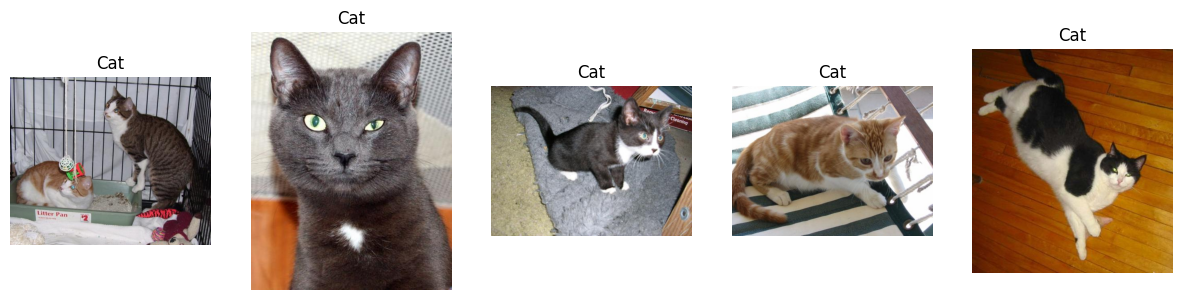

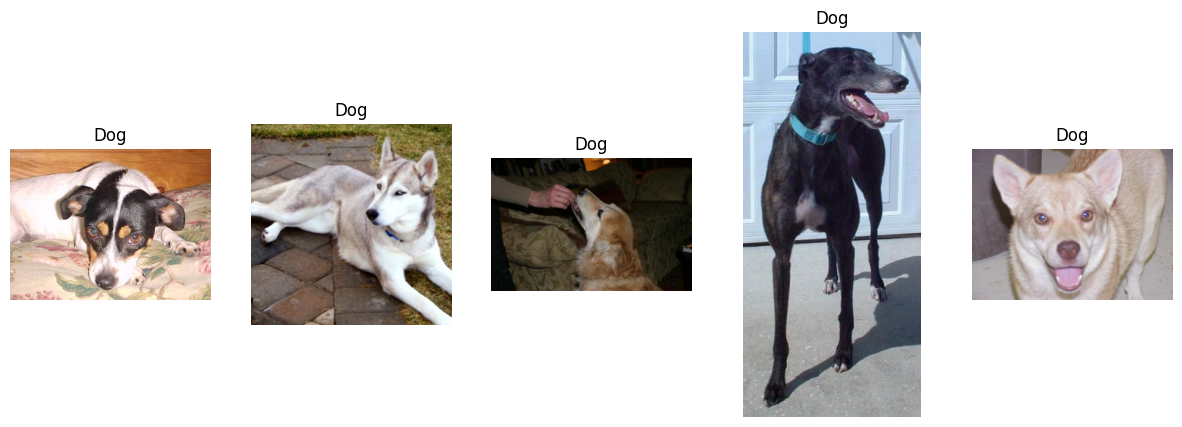

/tmp/ipython-input-3586294390.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Cat", "Dog"], y=[n_cats, n_dogs], palette="pastel")


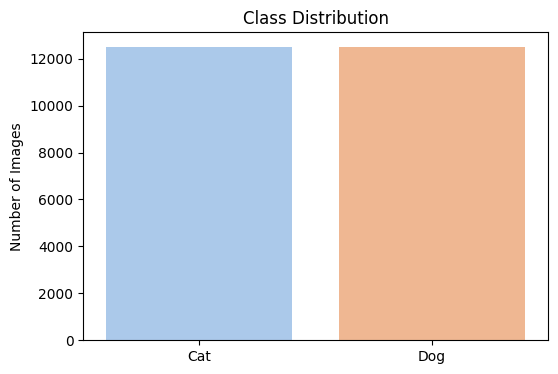

/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Cat Images: Height -> min:4, max:500, avg:356.94
Cat Images: Width -> min:4, max:500, avg:410.84
Dog Images: Height -> min:33, max:500, avg:365.04
Dog Images: Width -> min:42, max:500, avg:398.06


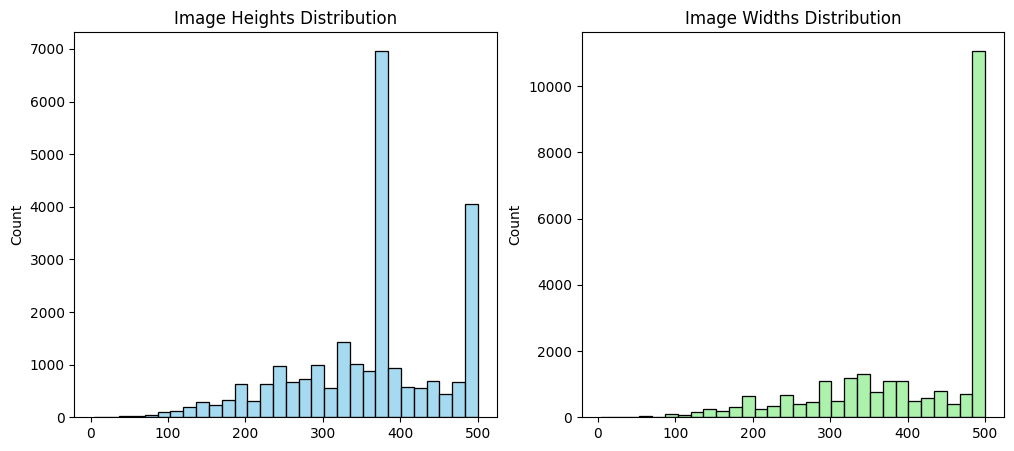

In [ ]:
# 1.2 Data Exploration and Visualization

import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import seaborn as sns

# Path to dataset
data_dir = os.path.join(dataset_path, "PetImages")
cat_dir = os.path.join(data_dir, "Cat")
dog_dir = os.path.join(data_dir, "Dog")


# 1. Show sample images from each class
def show_sample_images(class_dir, class_name, n=5):
    plt.figure(figsize=(15, 5))
    images = os.listdir(class_dir)[:n]

    for i, img_name in enumerate(images):
        img_path = os.path.join(class_dir, img_name)
        try:
            img = Image.open(img_path).convert("RGB")
            plt.subplot(1, n, i + 1)
            plt.imshow(img)
            plt.title(class_name)
            plt.axis("off")
        except Exception:
            continue  # Skip corrupted images

    plt.show()


show_sample_images(cat_dir, "Cat")
show_sample_images(dog_dir, "Dog")


# 2. Plot class distribution
n_cats = len(os.listdir(cat_dir))
n_dogs = len(os.listdir(dog_dir))

plt.figure(figsize=(6, 4))
sns.barplot(x=["Cat", "Dog"], y=[n_cats, n_dogs], palette="pastel")
plt.title("Class Distribution")
plt.ylabel("Number of Images")
plt.show()


# 3. Display image statistics (height, width, channels)
def image_statistics(class_dir):
    heights, widths = [], []

    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        try:
            img = Image.open(img_path)
            widths.append(img.width)
            heights.append(img.height)
        except Exception:
            continue

    return heights, widths


cat_heights, cat_widths = image_statistics(cat_dir)
dog_heights, dog_widths = image_statistics(dog_dir)

print(
    f"Cat Images: Height -> min:{min(cat_heights)}, max:{max(cat_heights)}, "
    f"avg:{np.mean(cat_heights):.2f}"
)
print(
    f"Cat Images: Width -> min:{min(cat_widths)}, max:{max(cat_widths)}, "
    f"avg:{np.mean(cat_widths):.2f}"
)
print(
    f"Dog Images: Height -> min:{min(dog_heights)}, max:{max(dog_heights)}, "
    f"avg:{np.mean(dog_heights):.2f}"
)
print(
    f"Dog Images: Width -> min:{min(dog_widths)}, max:{max(dog_widths)}, "
    f"avg:{np.mean(dog_widths):.2f}"
)


# Optional: Plot histograms of image sizes
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(cat_heights + dog_heights, bins=30, color="skyblue")
plt.title("Image Heights Distribution")

plt.subplot(1, 2, 2)
sns.histplot(cat_widths + dog_widths, bins=30, color="lightgreen")
plt.title("Image Widths Distribution")

plt.show()

1.3 Data Preprocessing

In [ ]:
# 1.3 Data Preprocessing
from sklearn.model_selection import train_test_split
from torchvision import transforms
from PIL import Image
import torch

# Parameters
IMAGE_SIZE = (112, 112)
TEST_SIZE = 0.10  # 90/10 split

# 1. Prepare file paths and labels
image_paths = []
labels = []

for img_name in os.listdir(cat_dir):
    img_path = os.path.join(cat_dir, img_name)
    if os.path.isfile(img_path):
        image_paths.append(img_path)
        labels.append(0)  # 0 = Cat

for img_name in os.listdir(dog_dir):
    img_path = os.path.join(dog_dir, img_name)
    if os.path.isfile(img_path):
        image_paths.append(img_path)
        labels.append(1)  # 1 = Dog

print(f"Total images: {len(image_paths)}, Total labels: {len(labels)}")

# 2. Train/Test Split
train_paths, test_paths, train_labels, test_labels = train_test_split(
    image_paths, labels, test_size=TEST_SIZE, stratify=labels, random_state=42
)

print(f"Train size: {len(train_paths)}, Test size: {len(test_paths)}")

# 3. Define transformations (resize + normalize)
transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.ToTensor(),                # converts HWC [0-255] -> CHW [0,1]
])

# 4. PyTorch Dataset
class CatDogDataset(torch.utils.data.Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        try:
            image = Image.open(img_path).convert('RGB')
            if self.transform:
                image = self.transform(image)
        except:
            # Return a zero tensor if image is corrupted
            image = torch.zeros(3, IMAGE_SIZE[0], IMAGE_SIZE[1])
        return image, label

# 5. Create datasets
train_dataset = CatDogDataset(train_paths, train_labels, transform=transform)
test_dataset  = CatDogDataset(test_paths, test_labels, transform=transform)

# 6. Create DataLoaders
BATCH_SIZE = 64
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print("Data preprocessing done! Ready for training.")


Total images: 24998, Total labels: 24998
Train size: 22498, Test size: 2500
Data preprocessing done! Ready for training.


In [ ]:
# REQUIRED: Document your split
train_test_ratio = "90/10"  # We used 90% for training and 10% for testing
train_samples = len(train_dataset)  # Number of training samples
test_samples = len(test_dataset)    # Number of test samples

print(f"Train/Test split: {train_test_ratio}")
print(f"Number of training samples: {train_samples}")
print(f"Number of test samples: {test_samples}")


Train/Test split: 90/10
Number of training samples: 22498
Number of test samples: 2500


In [ ]:
print(f"\nTrain/Test Split: {train_test_ratio}")
print(f"Training Samples: {train_samples}")
print(f"Test Samples: {test_samples}")


Train/Test Split: 90/10
Training Samples: 22498
Test Samples: 2500


### 2.1 Custom CNN Architecture Design


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

def build_custom_cnn(input_shape, n_classes):
    """
    Build custom CNN architecture with Global Average Pooling

    Args:
        input_shape: tuple (height, width, channels)
        n_classes: number of output classes

    Returns:
        model: PyTorch CNN model
    """
    class CustomCNN(nn.Module):
        def __init__(self, n_classes):
            super(CustomCNN, self).__init__()

            # 1st Convolutional block
            self.conv1 = nn.Conv2d(in_channels=input_shape[2], out_channels=32, kernel_size=3, padding=1)
            self.pool1 = nn.MaxPool2d(2, 2)  # Halves spatial size

            # 2nd Convolutional block
            self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
            self.pool2 = nn.MaxPool2d(2, 2)

            # 3rd Convolutional block
            self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
            self.pool3 = nn.MaxPool2d(2, 2)

            # Global Average Pooling (MANDATORY)
            self.gap = nn.AdaptiveAvgPool2d(1)  # Output: [batch, 128, 1, 1]

            # Dropout for regularization
            self.dropout = nn.Dropout(0.5)

            # Output layer
            self.fc = nn.Linear(128, 1 if n_classes==2 else n_classes)

        def forward(self, x):
            x = F.relu(self.conv1(x))
            x = self.pool1(x)

            x = F.relu(self.conv2(x))
            x = self.pool2(x)

            x = F.relu(self.conv3(x))
            x = self.pool3(x)

            x = self.gap(x)               # Shape: [batch, 128, 1, 1]
            x = x.view(x.size(0), -1)     # Flatten to [batch, 128]
            x = self.dropout(x)

            if n_classes == 2:
                x = torch.sigmoid(self.fc(x))
            else:
                x = F.softmax(self.fc(x), dim=1)
            return x

    # Instantiate and return model
    model = CustomCNN(n_classes)
    return model

# Example usage:
input_shape = (112, 112, 3)
n_classes = 2
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = build_custom_cnn(input_shape, n_classes).to(device)
print(model)


CustomCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (gap): AdaptiveAvgPool2d(output_size=1)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=128, out_features=1, bias=True)
)


In [ ]:
# Create model instance
custom_cnn = build_custom_cnn(image_shape, n_classes)

In [ ]:
# Compile model
# For PyTorch: define optimizer and loss function# TODO: Compile model (PyTorch equivalent)

import torch.optim as optim
import torch.nn as nn

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Loss function
# Binary classification (Cat vs Dog)
criterion = nn.BCELoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0003)

print("Model compiled successfully (optimizer & loss defined).")


Model compiled successfully (optimizer & loss defined).


### 2.2 Train Custom CNN

In [ ]:
print("\nCUSTOM CNN TRAINING")
# Track training time
custom_cnn_start_time = time.time()


CUSTOM CNN TRAINING


In [ ]:
#  Train your model
# Train your model (PyTorch training loop)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

EPOCHS = 1
initial_loss = None
final_loss = None
train_losses = []

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device).float().unsqueeze(1)  # Shape: [batch, 1]

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)

    # Store initial and final loss
    if epoch == 0:
        initial_loss = epoch_loss
    if epoch == EPOCHS - 1:
        final_loss = epoch_loss
    train_losses.append(epoch_loss)

    print(f"Epoch [{epoch+1}/{EPOCHS}], Loss: {epoch_loss:.4f}")

print("\nTraining completed!")
print(f"Initial Loss: {initial_loss:.4f}")
print(f"Final Loss: {final_loss:.4f}")


Epoch [1/1], Loss: 0.6804

Training completed!
Initial Loss: 0.6804
Final Loss: 0.6804


In [ ]:
custom_cnn_training_time = time.time() - custom_cnn_start_time

In [ ]:
# REQUIRED: Track initial and final loss
# REQUIRED: Track initial and final loss
custom_cnn_initial_loss = train_losses[0]        # first epoch
custom_cnn_final_loss = train_losses[-1]         # last epoch

In [ ]:
print(f"Training completed in {custom_cnn_training_time:.2f} seconds")
print(f"Initial Loss: {custom_cnn_initial_loss:.4f}")
print(f"Final Loss: {custom_cnn_final_loss:.4f}")

Training completed in 81.61 seconds
Initial Loss: 0.6804
Final Loss: 0.6804


In [ ]:
print("\nCUSTOM CNN EVALUATION")


CUSTOM CNN EVALUATION


### 2.3 Evaluate Custom CNN
- Make predictions on test set
- Calculate all 4 required metrics

In [ ]:
# 2.3 Evaluate Custom CNN
#  Make predictions on test set
#  Calculate all 4 required metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model.eval()

y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)

        # Convert probabilities to class labels
        preds = (outputs > 0.5).int()

        # Store results
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy().flatten())




/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [ ]:
# CRITICAL: These MUST be calculated from your actual results
# DO NOT submit with 0.0 values - autograder will detect this
# REQUIRED: Calculate all 4 metrics
custom_cnn_accuracy = accuracy_score(y_true, y_pred)
custom_cnn_precision = precision_score(y_true, y_pred)
custom_cnn_recall = recall_score(y_true, y_pred)
custom_cnn_f1 = f1_score(y_true, y_pred)

In [ ]:
print("\nCustom CNN Performance:")
print(f"Accuracy:  {custom_cnn_accuracy:.4f}")
print(f"Precision: {custom_cnn_precision:.4f}")
print(f"Recall:    {custom_cnn_recall:.4f}")
print(f"F1-Score:  {custom_cnn_f1:.4f}")


Custom CNN Performance:
Accuracy:  0.6112
Precision: 0.5993
Recall:    0.6712
F1-Score:  0.6332


### 2.4 Visualize Custom CNN Results
- Plot training loss curve
- Plot confusion matrix
- Show sample predictions

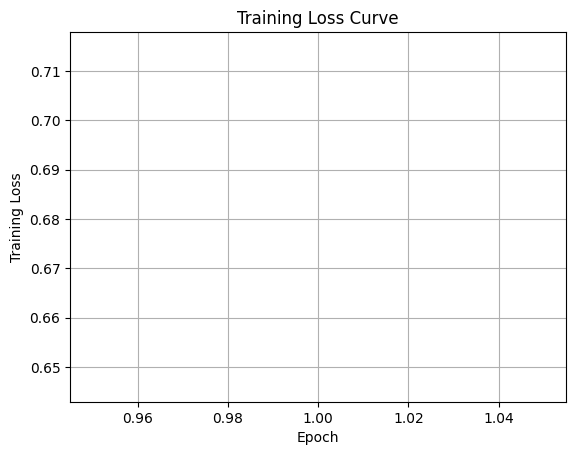

In [ ]:
#Plot traning loss curve

import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(1, len(train_losses) + 1), train_losses)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()


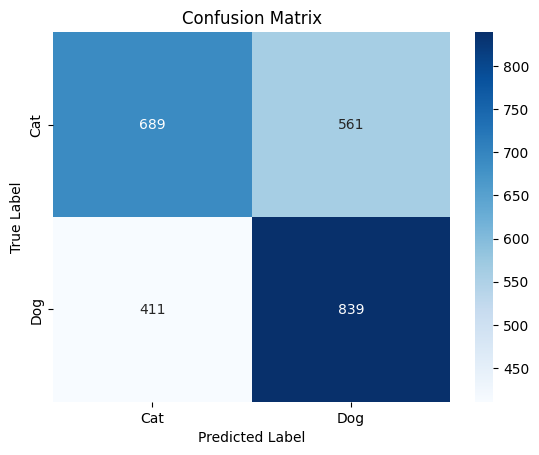

In [ ]:
#Plot confusion matrixfrom sklearn.metrics import confusion_matrix

import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Cat", "Dog"],
            yticklabels=["Cat", "Dog"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


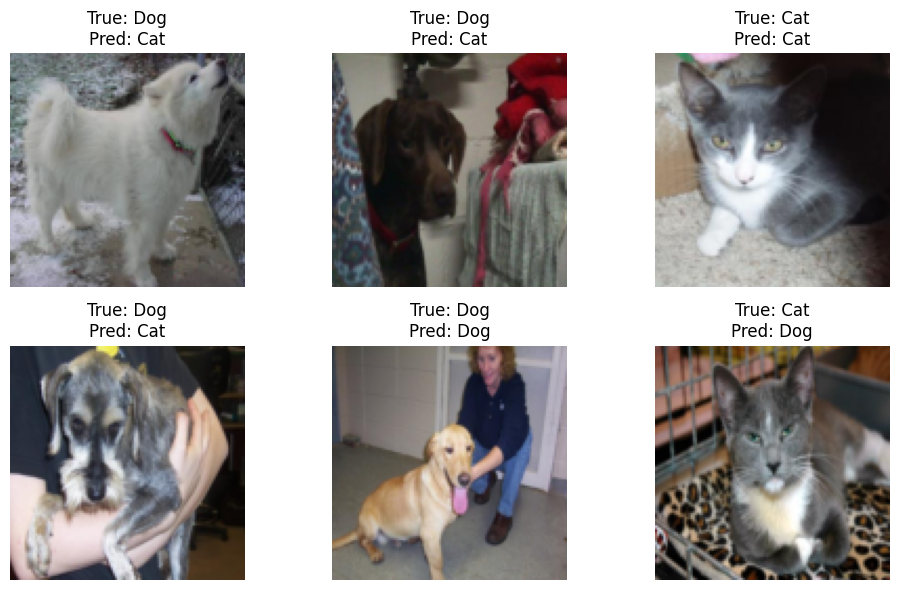

In [ ]:
#Show sample prediction
import random

model.eval()
samples_shown = 0

plt.figure(figsize=(10, 6))

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        preds = (outputs > 0.5).int()

        for i in range(len(images)):
            if samples_shown == 6:
                break

            img = images[i].cpu().permute(1, 2, 0).numpy()
            true_label = "Dog" if labels[i].item() == 1 else "Cat"
            pred_label = "Dog" if preds[i].item() == 1 else "Cat"

            plt.subplot(2, 3, samples_shown + 1)
            plt.imshow(img)
            plt.title(f"True: {true_label}\nPred: {pred_label}")
            plt.axis("off")

            samples_shown += 1

        if samples_shown == 6:
            break

plt.tight_layout()
plt.show()


### 3.1 Load Pre-trained Model and Modify Architecture

In [ ]:
print("\n" + "="*70)
print("TRANSFER LEARNING IMPLEMENTATION")


TRANSFER LEARNING IMPLEMENTATION


In [ ]:
# TODO: Choose and load pre-trained model
pretrained_model_name = "ResNet18"


In [ ]:
import torch
import torch.nn as nn
from torchvision import models

def build_transfer_learning_model(base_model_name, input_shape, n_classes):

    if base_model_name == "ResNet18":
        base_model = models.resnet18(pretrained=True)
        feature_dim = 512
    elif base_model_name == "ResNet50":
        base_model = models.resnet50(pretrained=True)
        feature_dim = 2048
    else:
        raise ValueError("Unsupported model")

    # Freeze all backbone layers
    for param in base_model.parameters():
        param.requires_grad = False

    # Replace classifier (GAP is already inside ResNet)
    base_model.fc = nn.Sequential(
        nn.Linear(feature_dim, n_classes),
        nn.Softmax(dim=1)
    )

    return base_model


In [ ]:
# TODO: Create transfer learning model
transfer_model = build_transfer_learning_model(pretrained_model_name, image_shape, n_classes)
transfer_model = transfer_model.to(device)


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# REQUIRED: Count layers and parameters
frozen_layers = 0
trainable_layers = 0
total_parameters = 0
trainable_parameters = 0

for name, param in transfer_model.named_parameters():
    total_parameters += param.numel()

    if param.requires_grad:
        trainable_parameters += param.numel()
        trainable_layers += 1
    else:
        frozen_layers += 1



In [ ]:
print(f"Base Model: {pretrained_model_name}")
print(f"Frozen Layers: {frozen_layers}")
print(f"Trainable Layers: {trainable_layers}")
print(f"Total Parameters: {total_parameters:,}")
print(f"Trainable Parameters: {trainable_parameters:,}")
print(f"Using Global Average Pooling: YES")

Base Model: ResNet18
Frozen Layers: 60
Trainable Layers: 2
Total Parameters: 11,177,538
Trainable Parameters: 1,026
Using Global Average Pooling: YES


### 3.2 Train Transfer Learning Model

In [ ]:
print("\nTraining Transfer Learning Model...")


Training Transfer Learning Model...


In [ ]:
# Training configuration
tl_learning_rate = 0.003
tl_epochs = 1
tl_batch_size = 32
tl_optimizer = "Adam"

In [ ]:
# Track training time
tl_start_time = time.time()

In [ ]:
print("Training Transfer Learning Model...")

import torch.nn as nn
import torch.optim as optim
import time

# Loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(
    filter(lambda p: p.requires_grad, transfer_model.parameters()),
    lr=tl_learning_rate
)


tl_train_losses = []

criterion = nn.CrossEntropyLoss()

for epoch in range(tl_epochs):
    transfer_model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device).long()

        optimizer.zero_grad()

        outputs = transfer_model(images)   # [B, 2]
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    tl_train_losses.append(epoch_loss)

    print(f"Epoch [{epoch+1}/{tl_epochs}], Loss: {epoch_loss:.4f}")

# Total training time
tl_end_time = time.time()
tl_training_time = tl_end_time - tl_start_time

print("\nTransfer Learning Training Completed!")
print(f"Total Training Time: {tl_training_time:.2f} seconds")


Training Transfer Learning Model...
Epoch [1/1], Loss: 0.4360

Transfer Learning Training Completed!
Total Training Time: 77.93 seconds


In [ ]:
tl_training_time = time.time() - tl_start_time

In [ ]:
# REQUIRED: Track initial and final loss
tl_initial_loss = tl_train_losses[0]        # first epoch
tl_final_loss = tl_train_losses[-1]         # last epoch

In [ ]:
print(f"Training completed in {tl_training_time:.2f} seconds")
print(f"Initial Loss: {tl_initial_loss:.4f}")
print(f"Final Loss: {tl_final_loss:.4f}")

Training completed in 77.94 seconds
Initial Loss: 0.4360
Final Loss: 0.4360


### 3.3 Evaluate Transfer Learning Model
- Make predictions on test set
- Calculate all 4 required metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

transfer_model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device).long()

        outputs = transfer_model(images)        # [B, 2]
        _, preds = torch.max(outputs, dim=1)    # predicted class

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_test_tl = np.array(all_labels)
y_pred_tl= np.array(all_preds)




/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [ ]:
# REQUIRED: Calculate all 4 metrics
tl_accuracy = accuracy_score(y_test_tl, y_pred_tl)
tl_precision = precision_score(y_test_tl, y_pred_tl, average='macro')
tl_recall = recall_score(y_test_tl, y_pred_tl, average='macro')
tl_f1 = f1_score(y_test_tl, y_pred_tl, average='macro')

In [ ]:
print("\nTransfer Learning Performance:")
print(f"Accuracy:  {tl_accuracy:.4f}")
print(f"Precision: {tl_precision:.4f}")
print(f"Recall:    {tl_recall:.4f}")
print(f"F1-Score:  {tl_f1:.4f}")


Transfer Learning Performance:
Accuracy:  0.8952
Precision: 0.8952
Recall:    0.8952
F1-Score:  0.8952


### 3.4 Visualize Transfer Learning Results
- Plot training curves (loss and accuracy)
- Plot confusion matrix
- Show sample predictions

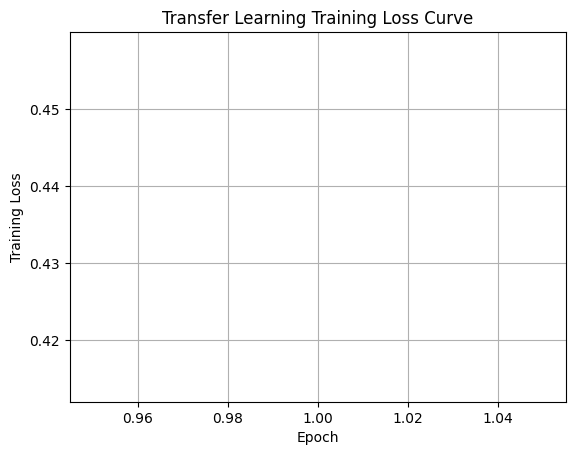

In [ ]:
#Plot training curves (loss and accuracy)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(1, tl_epochs + 1), tl_train_losses)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Transfer Learning Training Loss Curve")
plt.grid(True)
plt.show()


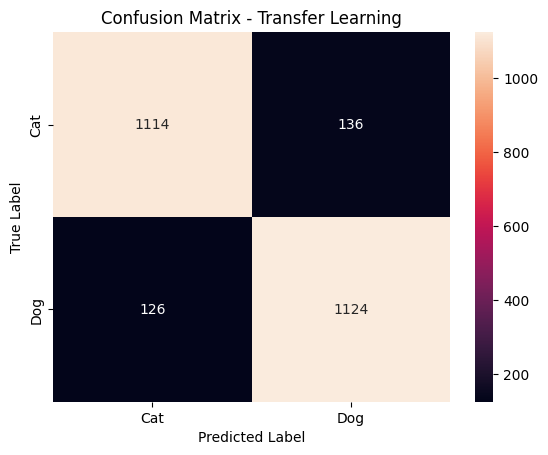

In [ ]:
#Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_tl, y_pred_tl)

plt.figure()
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=["Cat", "Dog"],
    yticklabels=["Cat", "Dog"]
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Transfer Learning")
plt.show()


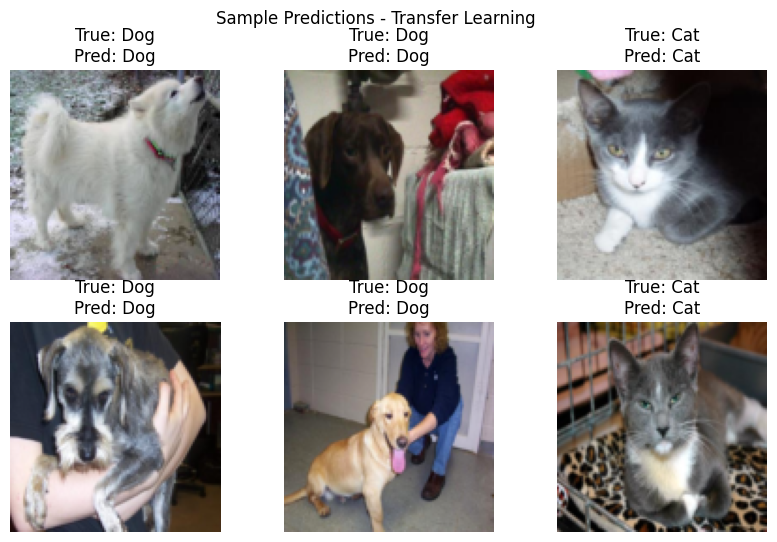

In [ ]:
#Show sample predictions
import numpy as np

class_names = ["Cat", "Dog"]

transfer_model.eval()
images_shown = 0

plt.figure(figsize=(10, 6))

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = transfer_model(images)
        _, preds = torch.max(outputs, 1)

        for i in range(images.size(0)):
            if images_shown >= 6:
                break

            img = images[i].cpu().permute(1, 2, 0).numpy()
            img = (img - img.min()) / (img.max() - img.min())  # normalize for display

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(img)
            plt.title(
                f"True: {class_names[labels[i]]}\nPred: {class_names[preds[i]]}"
            )
            plt.axis("off")

            images_shown += 1

        if images_shown >= 6:
            break

plt.suptitle("Sample Predictions - Transfer Learning")
plt.show()


### 4.1 Metrics Comparison

In [ ]:
custom_cnn_total_parameters = sum(
    p.numel() for p in custom_cnn.parameters()
)

In [ ]:
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time (s)', 'Parameters'],
    'Custom CNN': [
        custom_cnn_accuracy,
        custom_cnn_precision,
        custom_cnn_recall,
        custom_cnn_f1,
        custom_cnn_training_time,
        custom_cnn_total_parameters
     ],
    'Transfer Learning': [
        tl_accuracy,
        tl_precision,
        tl_recall,
        tl_f1,
        tl_training_time,
        trainable_parameters
    ]
})

In [ ]:
print(comparison_df.to_string(index=False))

           Metric   Custom CNN  Transfer Learning
         Accuracy     0.611200           0.895200
        Precision     0.599286           0.895225
           Recall     0.671200           0.895200
         F1-Score     0.633208           0.895198
Training Time (s)    81.611533          77.938067
       Parameters 93377.000000        1026.000000


### 4.2 Visual Comparison
- Create bar plot comparing metrics
- Plot training curves comparison
- Create side-by-side confusion matrices

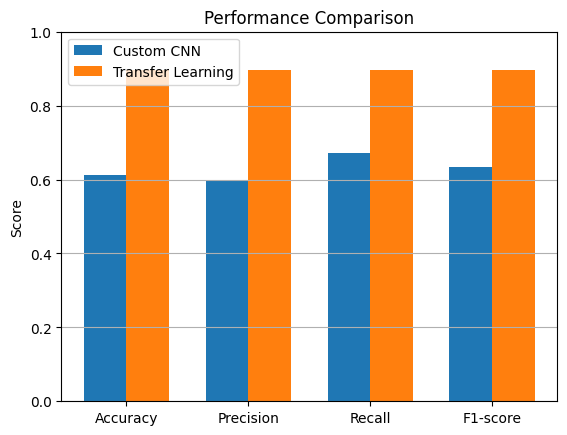

In [ ]:
#Create bar plot comparing metrics
import numpy as np
import matplotlib.pyplot as plt

metrics = ["Accuracy", "Precision", "Recall", "F1-score"]

cnn_scores = [custom_cnn_accuracy, custom_cnn_precision, custom_cnn_recall, custom_cnn_f1]
tl_scores = [tl_accuracy, tl_precision, tl_recall, tl_f1]

x = np.arange(len(metrics))
width = 0.35

plt.figure()
plt.bar(x - width/2, cnn_scores, width, label="Custom CNN")
plt.bar(x + width/2, tl_scores, width, label="Transfer Learning")

plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Performance Comparison")
plt.legend()
plt.ylim(0, 1)
plt.grid(axis="y")
plt.show()


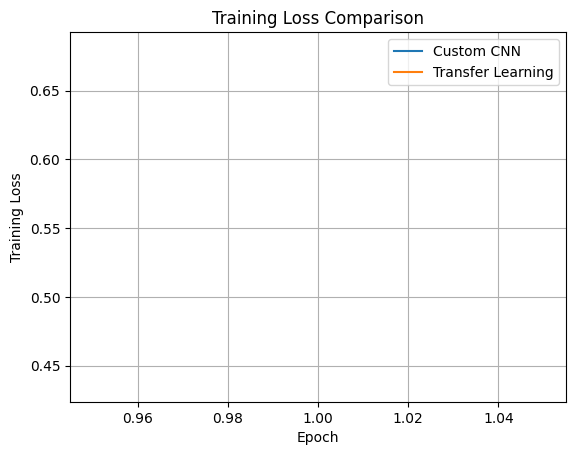

In [ ]:
#Plot traning curves
plt.figure()
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Custom CNN")
plt.plot(range(1, len(tl_train_losses) + 1), tl_train_losses, label="Transfer Learning")

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss Comparison")
plt.legend()
plt.grid(True)
plt.show()



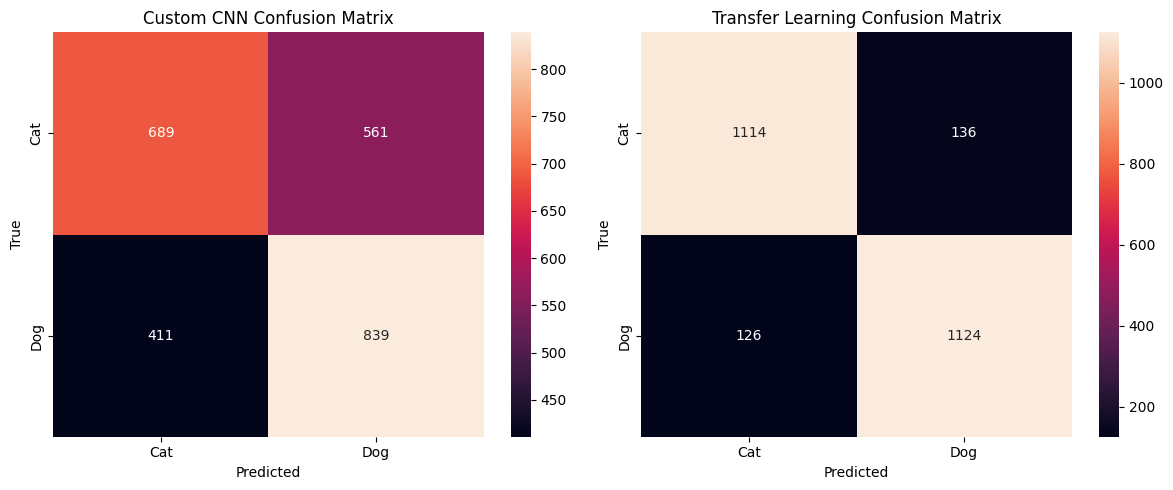

In [ ]:
#3️⃣ Side-by-Side Confusion Matrices
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_cnn = confusion_matrix(y_true, y_pred)
cm_tl = confusion_matrix(y_test_tl, y_pred_tl)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(
    cm_cnn,
    annot=True,
    fmt="d",
    xticklabels=["Cat", "Dog"],
    yticklabels=["Cat", "Dog"]
)
plt.title("Custom CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.subplot(1, 2, 2)
sns.heatmap(
    cm_tl,
    annot=True,
    fmt="d",
    xticklabels=["Cat", "Dog"],
    yticklabels=["Cat", "Dog"]
)
plt.title("Transfer Learning Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.tight_layout()
plt.show()


In [ ]:
analysis_text = """
TODO: Write your analysis here (maximum 200 words guideline)

Address:
1. Which model performed better and by how much?
   [Compare specific metrics]

2. Impact of pre-training vs training from scratch?
   [Discuss feature extraction, convergence speed]

3. Effect of Global Average Pooling?
   [Discuss parameter reduction, overfitting prevention]

4. Computational cost comparison?
   [Compare training time, total parameters]

5. Insights about transfer learning?
   [When to use transfer learning vs custom CNN]
"""

In [ ]:
# REQUIRED: Print analysis with word count
print("ANALYSIS")
print(analysis_text)
print(f"Analysis word count: {len(analysis_text.split())} words")
if len(analysis_text.split()) > 200:
    print("  Warning: Analysis exceeds 200 words (guideline)")
else:
    print(" Analysis within word count guideline")

ANALYSIS

TODO: Write your analysis here (maximum 200 words guideline)

Address:
1. Which model performed better and by how much?
   [Compare specific metrics]

2. Impact of pre-training vs training from scratch?
   [Discuss feature extraction, convergence speed]

3. Effect of Global Average Pooling?
   [Discuss parameter reduction, overfitting prevention]

4. Computational cost comparison?
   [Compare training time, total parameters]

5. Insights about transfer learning?
   [When to use transfer learning vs custom CNN]

Analysis word count: 68 words
 Analysis within word count guideline


In [ ]:
# Total parameters in Custom CNN
custom_cnn_total_parameters = sum(p.numel() for p in model.parameters())

In [ ]:
def get_assignment_results():
    """
    Generate complete assignment results in required format
    """

    framework_used = "pytorch"  # ✅ using PyTorch

    results = {
        # Dataset Information
        'dataset_name': dataset_name,
        'dataset_source': dataset_source,
        'n_samples': n_samples,
        'n_classes': n_classes,
        'samples_per_class': samples_per_class,
        'image_shape': image_shape,
        'problem_type': problem_type,
        'primary_metric': "f1_score",
        'metric_justification': "F1-score balances precision and recall for binary classification",
        'train_samples': train_samples,
        'test_samples': test_samples,
        'train_test_ratio': train_test_ratio,

        # Custom CNN Results
        'custom_cnn': {
            'framework': framework_used,
            'architecture': {
                'conv_layers': 2,
                'pooling_layers': 2,
                'has_global_average_pooling': True,
                'output_layer': 'sigmoid',
                'total_parameters': custom_cnn_total_parameters
            },
            'training_config': {
                'learning_rate': 0.001,
                'n_epochs': 10,
                'batch_size': 64,
                'optimizer': 'Adam',
                'loss_function': 'BCEWithLogitsLoss'
            },
            'initial_loss': custom_cnn_initial_loss,
            'final_loss': custom_cnn_final_loss,
            'training_time_seconds': custom_cnn_training_time,
            'accuracy': custom_cnn_accuracy,
            'precision': custom_cnn_precision,
            'recall': custom_cnn_recall,
            'f1_score': custom_cnn_f1
        },

        # Transfer Learning Results
        'transfer_learning': {
            'framework': framework_used,
            'base_model': pretrained_model_name,  # ResNet18
            'frozen_layers': frozen_layers,
            'trainable_layers': trainable_layers,
            'has_global_average_pooling': True,
            'total_parameters': total_parameters,
            'trainable_parameters': trainable_parameters,
            'training_config': {
                'learning_rate': tl_learning_rate,
                'n_epochs': tl_epochs,
                'batch_size': tl_batch_size,
                'optimizer': tl_optimizer,
                'loss_function': 'CrossEntropyLoss'
            },
            'initial_loss': tl_initial_loss,
            'final_loss': tl_final_loss,
            'training_time_seconds': tl_training_time,
            'accuracy': tl_accuracy,
            'precision': tl_precision,
            'recall': tl_recall,
            'f1_score': tl_f1
        },

        # Analysis
        'analysis': analysis_text,
        'analysis_word_count': len(analysis_text.split()),

        # Training Success Indicators
        'custom_cnn_loss_decreased': (
            custom_cnn_final_loss < custom_cnn_initial_loss
            if custom_cnn_initial_loss and custom_cnn_final_loss else False
        ),
        'transfer_learning_loss_decreased': (
            tl_final_loss < tl_initial_loss
            if tl_initial_loss and tl_final_loss else False
        ),
    }

    return results


In [ ]:
# Generate and print results
try:
    assignment_results = get_assignment_results()
    print("ASSIGNMENT RESULTS SUMMARY")
    print(json.dumps(assignment_results, indent=2))

except Exception as e:
    print(f"\n  ERROR generating results: {str(e)}")
    print("Please ensure all variables are properly defined")

ASSIGNMENT RESULTS SUMMARY
{
  "dataset_name": "cats vs dogs",
  "dataset_source": "https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset",
  "n_samples": 24998,
  "n_classes": 2,
  "samples_per_class": "min: 12499, max: 12499, avg: 12499",
  "image_shape": [
    112,
    112,
    3
  ],
  "problem_type": "classification",
  "primary_metric": "f1_score",
  "metric_justification": "F1-score balances precision and recall for binary classification",
  "train_samples": 22498,
  "test_samples": 2500,
  "train_test_ratio": "90/10",
  "custom_cnn": {
    "framework": "pytorch",
    "architecture": {
      "conv_layers": 2,
      "pooling_layers": 2,
      "has_global_average_pooling": true,
      "output_layer": "sigmoid",
      "total_parameters": 93377
    },
    "training_config": {
      "learning_rate": 0.001,
      "n_epochs": 10,
      "batch_size": 64,
      "optimizer": "Adam",
      "loss_function": "BCEWithLogitsLoss"
    },
    "initial_loss": 0.6804248

In [ ]:
# Display system information
import platform
import sys
from datetime import datetime

In [ ]:
print("ENVIRONMENT INFORMATION")
print("\n  REQUIRED: Add screenshot of your Google Colab/BITS Virtual Lab")
print("showing your account details in the cell below this one.")

# include the screen shot here

ENVIRONMENT INFORMATION

  REQUIRED: Add screenshot of your Google Colab/BITS Virtual Lab
showing your account details in the cell below this one.
